# Introduction

The notebook consists of health and demographic data for the period 2014-2015, obtained from Global Health Observatory Data Repository. It conisits of graphs that illustrate different relationships across different regions.




# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset

In [2]:
df = pd.read_csv("../Data/data.csv")
df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


# 1. Data Preprocessing

In [3]:
df.shape

(194, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

We have 2 categorial features and 11 numerical features

In [5]:
df.isnull().sum()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

We have columns that have missing values. Fix the missing values.

In [6]:

df.loc[df['PrimarySchoolEnrollmentFemale'].isnull(), 'PrimarySchoolEnrollmentFemale'] = df['PrimarySchoolEnrollmentFemale'].mean()
df.loc[df['PrimarySchoolEnrollmentMale'].isnull(), 'PrimarySchoolEnrollmentMale'] = df['PrimarySchoolEnrollmentMale'].mean()
df.loc[df['CellularSubscribers'].isnull(), 'CellularSubscribers'] = df['CellularSubscribers'].mean()
df.loc[df['FertilityRate'].isnull(), 'FertilityRate'] = df['FertilityRate'].mean()
df.loc[df['LiteracyRate'].isnull(), 'LiteracyRate'] = df['LiteracyRate'].mean()
df.loc[df['GNI'].isnull(), 'GNI'] = df['GNI'].mean()

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64

You can either drop the missing values or you can imputate the values.
For the missing values i replaced them with the average value


In [8]:
df.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+05,10.534573,7.149331,1.438161,9.259075,37.992935,40.313632,12.744398,13876.421938,7.930316,9.226320
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.842500,64.000000,8.425000,66.057500,83.710680,3330.000000,90.850495,89.632673
50%,7.790000e+03,28.650000,8.530000,2.490000,72.500000,18.600000,94.315000,83.710680,11085.000000,90.850495,89.632673
75%,2.453525e+04,37.752500,16.687500,3.767500,76.000000,55.975000,117.980000,92.125000,14617.500000,94.800000,95.325000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


In [9]:
df['Country'].count()

194

Checked the data to see of anything is wrong with the data and i find that besides the missing values the data looks fine.

# Answering questions provided

In [10]:
df[df['Under15'] == min(df['Under15'])]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,83.71068,35330.0,90.850495,89.632673


In [11]:
df[df['Under15'] == max(df['Under15'])]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
123,Niger,Africa,17157,49.99,4.26,7.58,56,113.5,29.52,83.71068,720.0,64.2,52.0


The country with the lowest of their population under 15 is Japan and the country with the highest of their population under 15 is Niger.

In [12]:
df[['Region', 'Over60']].groupby('Region').max()


,Over60
Region,
Africa,13.23
Americas,20.82
Eastern Mediterranean,12.03
Europe,26.97
South-East Asia,13.96
Western Pacific,31.92


In [13]:
df[df['Over60'] == max(df['Over60'])]['Region']

85    Western Pacific
Name: Region, dtype: object

The region with the highest of their population over 60 is the Western Pacific followed by Europe with the lowest being Africa

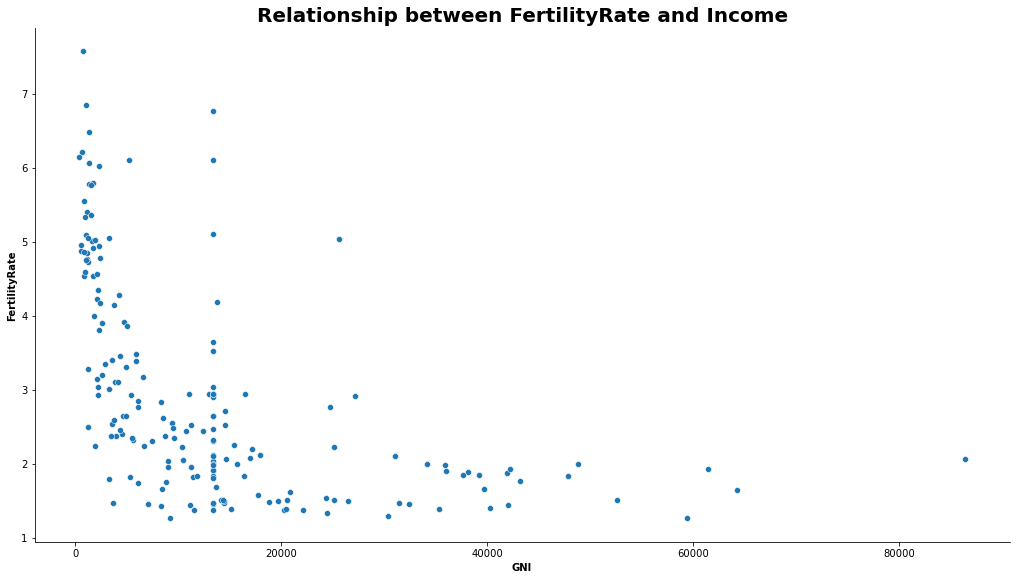

In [14]:
sns.relplot(x="GNI", y="FertilityRate", data=df,);
plt.xlabel('GNI', fontweight='bold')
plt.ylabel('FertilityRate', fontweight='bold')
plt.title("Relationship between FertilityRate and Income",fontsize=20, fontweight="bold");
plt.gcf().set_size_inches(15, 8)



In [15]:
df[(df['GNI'] > 10000) & (df['FertilityRate'] > 3.5) & (df['FertilityRate'] < 6)]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
49,Djibouti,Eastern Mediterranean,860,33.72,5.96,3.53,58,80.9,21.320000,83.71068,13320.925926,90.850495,89.632673
55,Equatorial Guinea,Africa,736,38.95,4.53,5.04,54,100.3,59.150000,93.90000,25620.000000,56.500000,56.000000
62,Gabon,Africa,1633,38.49,7.38,4.18,62,62.0,117.320000,88.40000,13740.000000,90.850495,89.632673
160,South Sudan,Eastern Mediterranean,10838,42.28,5.26,5.10,54,104.0,93.641522,83.71068,13320.925926,90.850495,89.632673
193,Zimbabwe,Africa,13724,40.24,5.68,3.64,54,89.8,72.130000,92.20000,13320.925926,90.850495,89.632673


Fertility rate decreases as income increases. For countries such as Gabon and Equatorial Guinea, this is not the case

In [16]:

df[['Region', 'LiteracyRate']].groupby('Region').min()


,LiteracyRate
Region,
Africa,31.10000
Americas,75.20000
Eastern Mediterranean,63.90000
Europe,83.71068
South-East Asia,56.80000
Western Pacific,60.60000


Africa has the lowest LiteracyRate.The difference between Africa who has the lowest literacyrate and Europe that has the highest is very huge. 

In [17]:
df_ = df[df['LiteracyRate'].notnull()]
df_[df_['LiteracyRate'] == min(df_['LiteracyRate'])]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
104,Mali,Africa,14854,47.14,4.29,6.85,51,128.0,68.32,31.1,1040.0,70.6,60.8


In [18]:
df[['Region', 'ChildMortality']].groupby('Region').min()


,ChildMortality
Region,
Africa,13.1
Americas,5.3
Eastern Mediterranean,7.4
Europe,2.2
South-East Asia,9.6
Western Pacific,2.9


Europe has the lowest child mortality rate and Africa has the highest mortality rate.

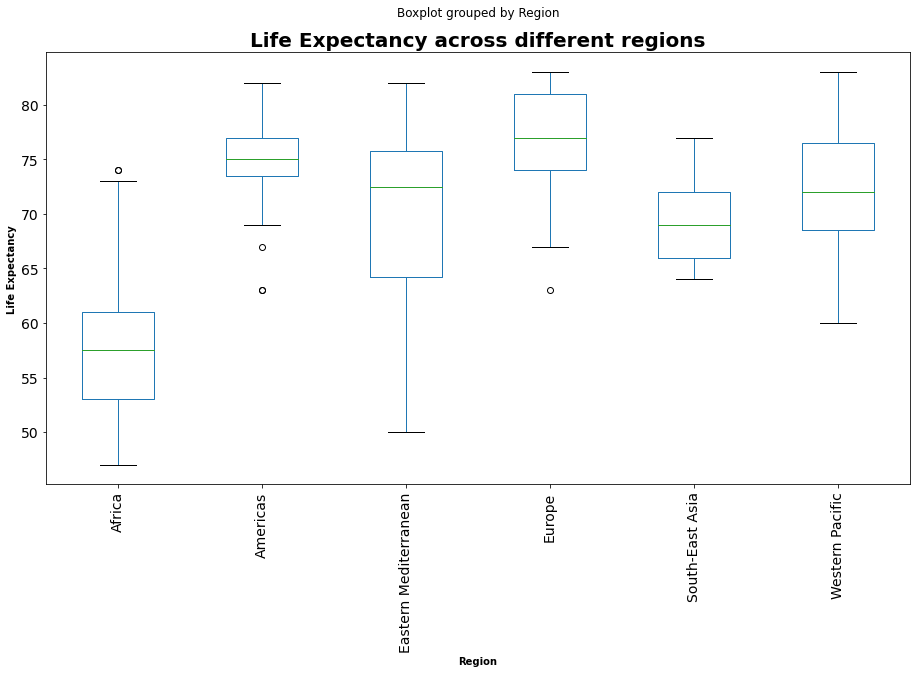

In [19]:
df.boxplot(by="Region", column=['LifeExpectancy'], grid=False, rot=90, fontsize=14)
plt.ylabel('Life Expectancy' , fontweight='bold')
plt.xlabel('Region', fontweight='bold')
plt.title('Life Expectancy across different regions', fontsize=20, fontweight="bold")
plt.gcf().set_size_inches(15, 8)



Africa has the lowest Life Expectancy, Europe and Americas has the highest life expectancy.

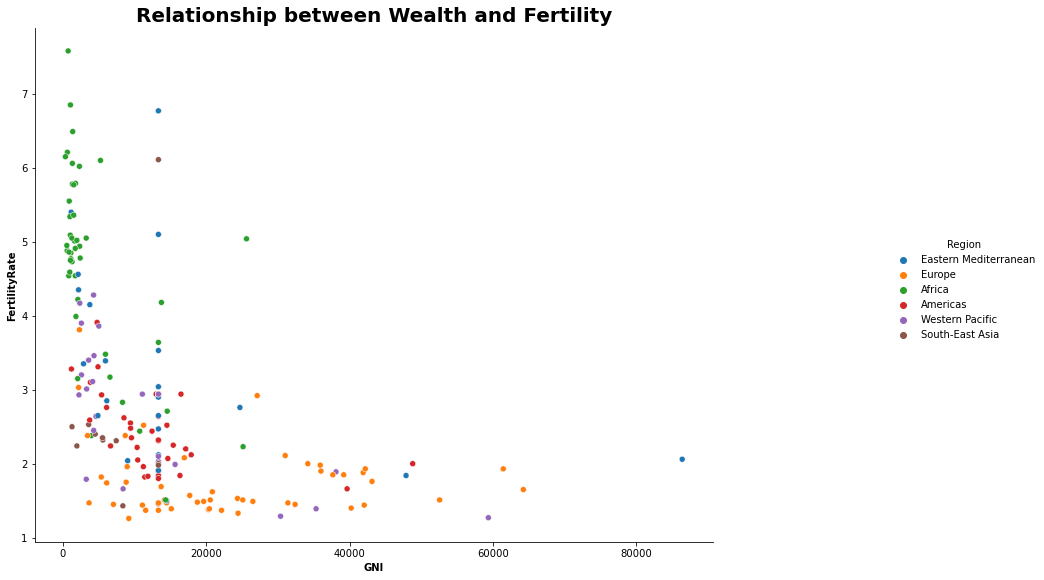

In [20]:
sns.relplot(x="GNI", y="FertilityRate", hue="Region", data=df);
plt.xlabel('GNI', fontweight='bold')
plt.ylabel('FertilityRate', fontweight='bold')
plt.title('Relationship between Wealth and Fertility', fontsize=20, fontweight="bold")
plt.gcf().set_size_inches(15, 8)
plt.show()

FertilityRate decreases as the income increases.Countries with a lower FertilityRate have a higher GNI.Few African countries have a slightly higher GNI with a high fertility Rate.

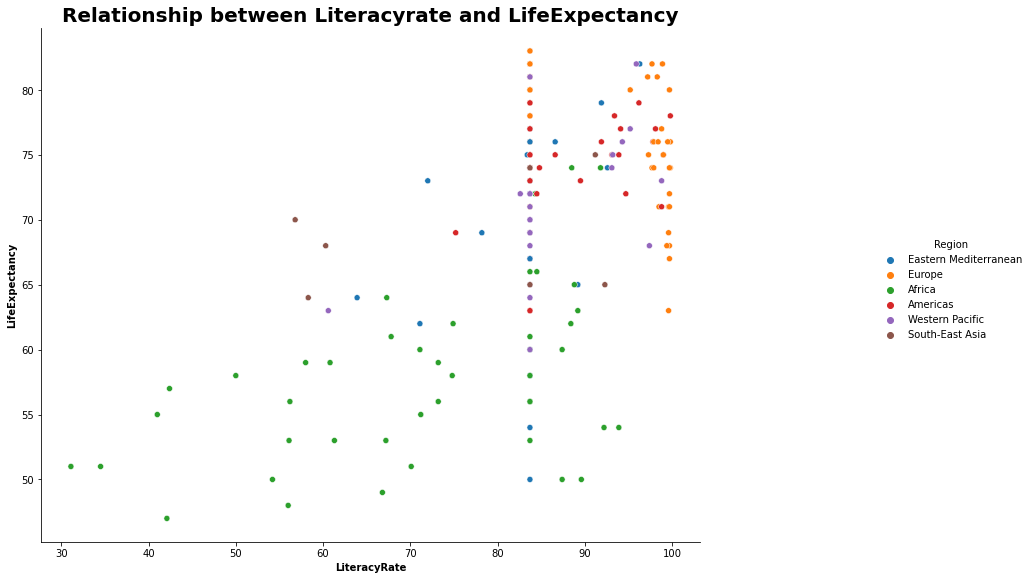

In [21]:
sns.relplot(x="LiteracyRate", y="LifeExpectancy", hue="Region", data=df);
plt.xlabel('LiteracyRate', fontweight='bold')
plt.ylabel('LifeExpectancy', fontweight='bold')
plt.title('Relationship between Literacyrate and LifeExpectancy', fontsize=20, fontweight="bold")
plt.gcf().set_size_inches(15, 8)
plt.show()

The higher the literacy rate the higher the life expectancy.Most African countries have a lower literacyRate compared to other countries in other Regions which also results in a lower life expectancy.

# 2. Exploratory data analysis

EDA is primarily used to see what data can reveal and provides a better understanding of data set variables and the relationships between them

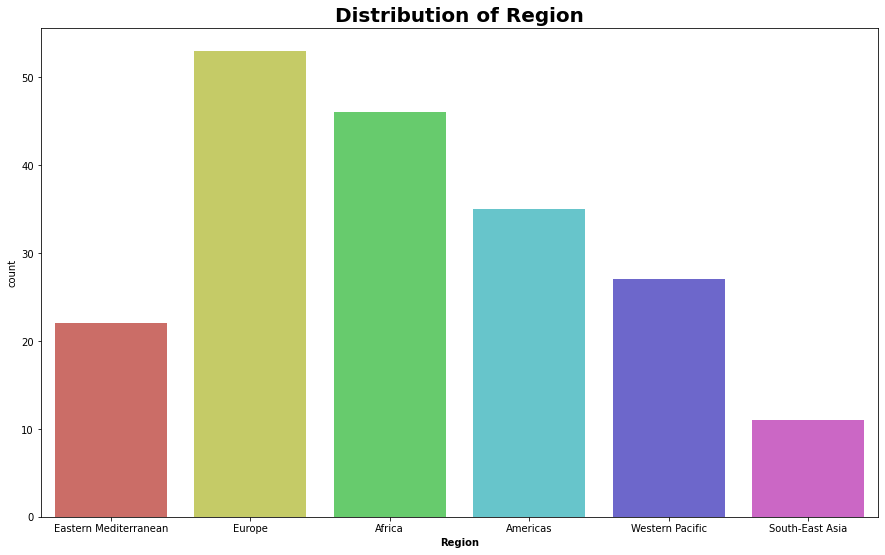

In [22]:
plt.figure(figsize=(15,9))
sns.countplot(x = 'Region', data = df, palette="hls")
plt.xlabel('Region', fontweight='bold')
plt.title("Distribution of Region",fontsize=20, fontweight="bold");


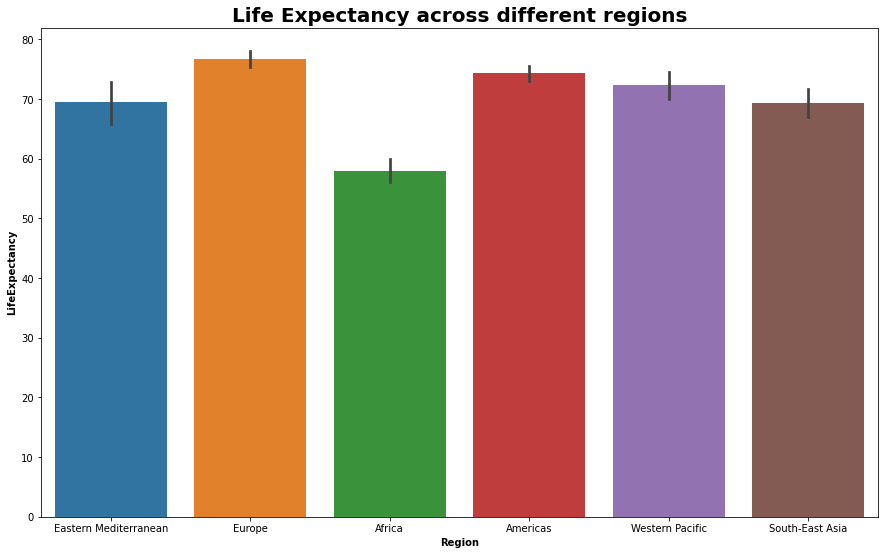

In [23]:
plt.figure(figsize=(15,9))
sns.barplot(data=df, x='Region', y = 'LifeExpectancy')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('LifeExpectancy', fontweight='bold')
plt.title("Life Expectancy across different regions",fontsize=20, fontweight="bold");


The African Region has the lowest life expectancy rate while Europe has the highest Life Expectancy rate.

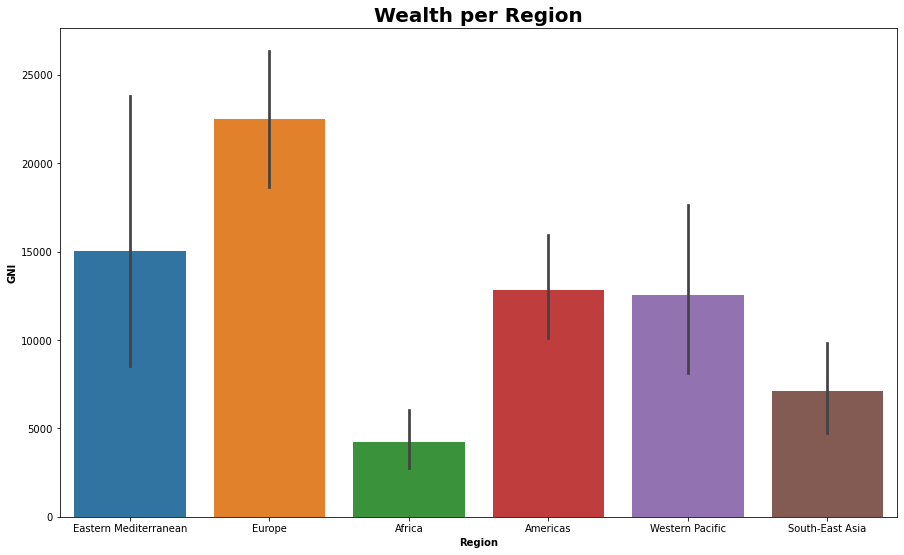

In [24]:
plt.figure(figsize=(15,9))
sns.barplot(data=df, x= 'Region', y = 'GNI')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('GNI', fontweight='bold')
plt.title("Wealth per Region",fontsize=20, fontweight="bold");


Europe has the highest GNI rate and Africa has the lowest GNI rate. GNI measures wealth 

# 3. Conclusion and insights 

Africa is one of the regions that are struggling.They have a higher fertility rate yet the lowest GNI rate.Their litercy rate is also fairly low compared to other regions.Life expectancy in the African region is lower.Europe has a higher life expectancy as well as a higher GNI rate.This concludes that countries with a higher GNI tend to have a higher life expectancy rate.
Europe is one of the regions that is doing fairly well